In [36]:
%matplotlib inline
import matplotlib.pyplot as plt

def configure_plots():
    '''Configures plots by making some quality of life adjustments'''
    for _ in range(2):
        plt.rcParams['figure.figsize'] = [16/4, 9/4]
        plt.rcParams['axes.titlesize'] = 20
        plt.rcParams['axes.labelsize'] = 16
        plt.rcParams['xtick.labelsize'] = 14
        plt.rcParams['ytick.labelsize'] = 14
        plt.rcParams['lines.linewidth'] = 2

configure_plots()

# for n, id in enumerate(med["Individual Id"].unique()):
#     df = med[med["Individual Id"] == id] 
#     plt.plot(df["Date"], df["Weight"])
#     plt.title(id)
#     plt.show()
# df = med[med["Individual Id"] == 100]
# plt.plot(df["Date"], df["Height"])

In [23]:
import pandas as pd
import numpy as np

med = pd.read_csv("../data/med.csv")
people = pd.read_csv("../data/people.csv")
combined= pd.read_csv("../data/combined.csv")

oldest_in_ed = people[people["Education Program"]==True]["Age"].max()
print(f'Oldest age of a child in the education program: {oldest_in_ed}')

kids = people[people["Age"] < 15]

percent_in_ed = np.round(np.mean(kids["Education Program"])*100, 2)
print(f'Percent of kids participating in the education program: {percent_in_ed}%')

Oldest age of a child in the education program: 14.0
Percent of kids participating in the education program: 27.39%


In [65]:
import datetime

def summarize_program(df, program): 

    percent_in = np.round(np.mean(df[program]==True)*100, 2)
    print(f'Percent participating in {program}: {percent_in}%')

    in_program = df[df[program]==True]
    no_program = df[df[program]==False]

    #Compare cavities between groups
    mean_cav = np.round(np.mean(in_program["Cavities"]),2)
    no_mean_cav = np.round(np.mean(no_program["Cavities"]),2)

    print(f'Average cavities program: {mean_cav}')
    print(f'Average cavities not: {no_mean_cav}')

    #compare missing between groups
    mean_miss = np.round(np.mean(in_program["Missing"]),2)
    no_mean_miss = np.round(np.mean(no_program["Missing"]),2)

    print(f'Average missing program: {mean_miss}')
    print(f'Average missing not: {no_mean_miss}')

    #compare bmi between groups
    mean_bmi = np.round(np.mean(in_program["Bmi"]),2)
    no_mean_bmi = np.round(np.mean(no_program["Bmi"]),2)

    print(f'Average bmi program: {mean_bmi}')
    print(f'Average bmi not: {no_mean_bmi}')

    #compare soda sugar between groups
    mean_sugar = np.round(np.mean(in_program["Soda Sugar"]),2)
    no_mean_sugar = np.round(np.mean(no_program["Soda Sugar"]),2)

    print(f'Average sugar program: {mean_sugar}')
    print(f'Average sugar not: {no_mean_sugar}')

    classes_in, counts_in = np.unique((in_program["Oral Hygiene"]).dropna().to_list(), return_counts=True)
    plt.bar(classes_in, counts_in)
    plt.title('Oral Hygene Program')
    plt.show()

    classes_no, counts_no = np.unique((no_program["Oral Hygiene"]).dropna().to_list(), return_counts=True)
    plt.bar(classes_no, counts_no)
    plt.title('Oral Hygene Non Program')
    plt.show()

    cavityr_in, cavityr_count_in = np.unique((in_program["Cavity Risk"]).dropna().to_list(), return_counts=True)
    plt.bar(cavityr_in, cavityr_count_in)
    plt.title('Cavity Risk Program')
    plt.show()

    cavityr_no, cavityr_count_no = np.unique((no_program["Cavity Risk"]).dropna().to_list(), return_counts=True)
    plt.bar(cavityr_no, cavityr_count_no)
    plt.title('Cavity Risk Non Program')
    plt.show()

Percent participating in Feed A Family: 76.92%
Average cavities program: 2.39
Average cavities not: 2.72
Average missing program: 1.46
Average missing not: 1.31
Average bmi program: 23.37
Average bmi not: 25.56
Average sugar program: 36.37
Average sugar not: 35.68


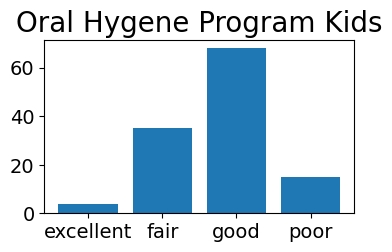

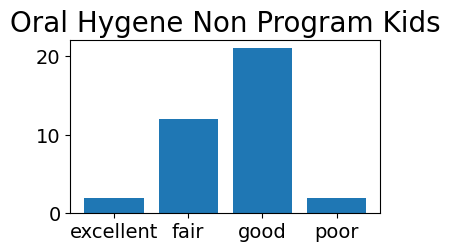

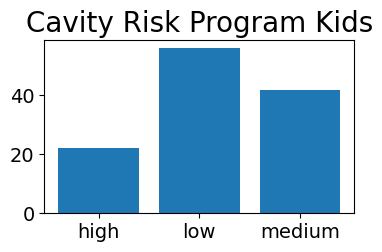

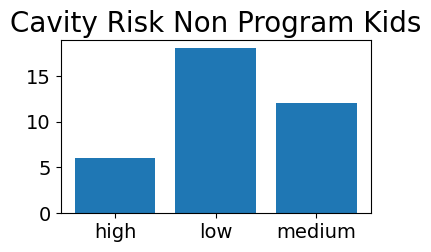

In [69]:
med_to_merge = med.reset_index().set_index("Individual Id")
kids_med = kids.merge(med, on="Individual Id", how="left")
kids_med_23 = kids_med[kids_med["Date"] == str(datetime.date(2023, 4, 1))]

combined23 = combined[combined["Date"] == str(datetime.date(2023, 4, 1))]

summarize_program(combined23, "Feed A Family")

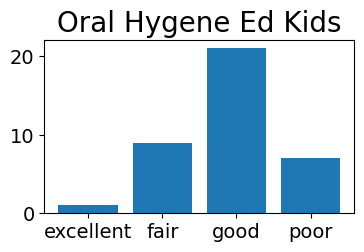

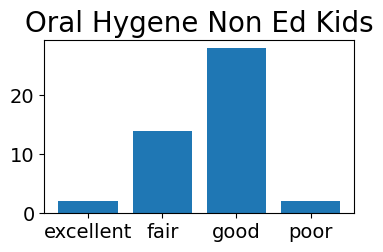

In [55]:
# classes, counts = np.unique(ed_23["Oral Hygiene"], return_counts=True)

# print(counts)
# print(classes)

# plt.bar(classes, counts)
# plt.title('Class Distribution - Breast Cancer Dataset')

classes_ed, counts_ed = np.unique((ed_23["Oral Hygiene"]).dropna().to_list(), return_counts=True)
plt.bar(classes_ed, counts_ed)
plt.title('Oral Hygene Program Kids')
plt.show()

classes_no, counts_no = np.unique((no_ed_23["Oral Hygiene"]).dropna().to_list(), return_counts=True)
plt.bar(classes_no, counts_no)
plt.title('Oral Hygene Non Program Kids')
plt.show()

cavityr_ed, cavityr_count_ed = np.unique((ed_23["Cavity Risk"]).dropna().to_list(), return_counts=True)
plt.bar(cavityr_ed, cavityr_count_ed)
plt.title('Cavity Risk Program Kids')
plt.show()

cavityr_no, cavityr_count_no = np.unique((no_ed_23["Cavity Risk"]).dropna().to_list(), return_counts=True)
plt.bar(cavityr_no, cavityr_count_no)
plt.title('Cavity Risk Non Program Kids')
plt.show()

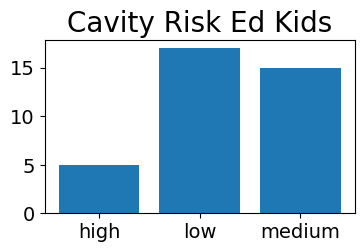

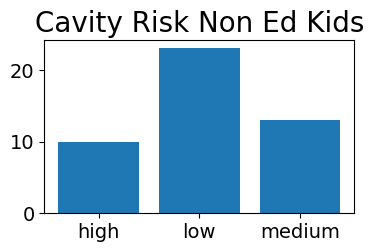

In [58]:
cavityr_ed, cavityr_count_ed = np.unique((ed_23["Cavity Risk"]).dropna().to_list(), return_counts=True)
plt.bar(cavityr_ed, cavityr_count_ed)
plt.title('Cavity Risk Program Kids')
plt.show()

cavityr_no, cavityr_count_no = np.unique((no_ed_23["Cavity Risk"]).dropna().to_list(), return_counts=True)
plt.bar(cavityr_no, cavityr_count_no)
plt.title('Cavity Risk Non Program Kids')
plt.show()